In [5]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [6]:
css()

In [7]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [8]:
update('collocations')

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\UiO-november\collocations.py`

In [9]:
from collocations import make_collocations, collocation, colls2df, urn_coll

In [10]:
import pandas as pd

In [11]:
import ast

In [12]:
#colls_before = pd.read_json('demokrati_before.json')

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'figure.figsize':(14,7), 'lines.linewidth': 6, 'grid.alpha':0.4})

In [15]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [16]:
#colls_after = pd.read_json('demokrati_after.json')

In [17]:
#colls_before.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_before.columns))

In [18]:
#colls_after.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_after.columns))

In [19]:
#show = lambda res, col, axis=1: res.sort_values(by=col, ascending=False).head(20).fillna(0).style.background_gradient(axis=axis)

In [20]:
demokrati = nb.make_graph('demokrati', cutoff=16)

# NB-digital og utvikling av begreper/ord

<br>
<br>

## Lars G.B. Johnsen
## Nasjonaliblioteket

<br>
<br>

### se også Histwords

https://nlp.stanford.edu/projects/histwords/

<br>
<br>
<br>
<br><br>
<br>

# DH-lab

https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

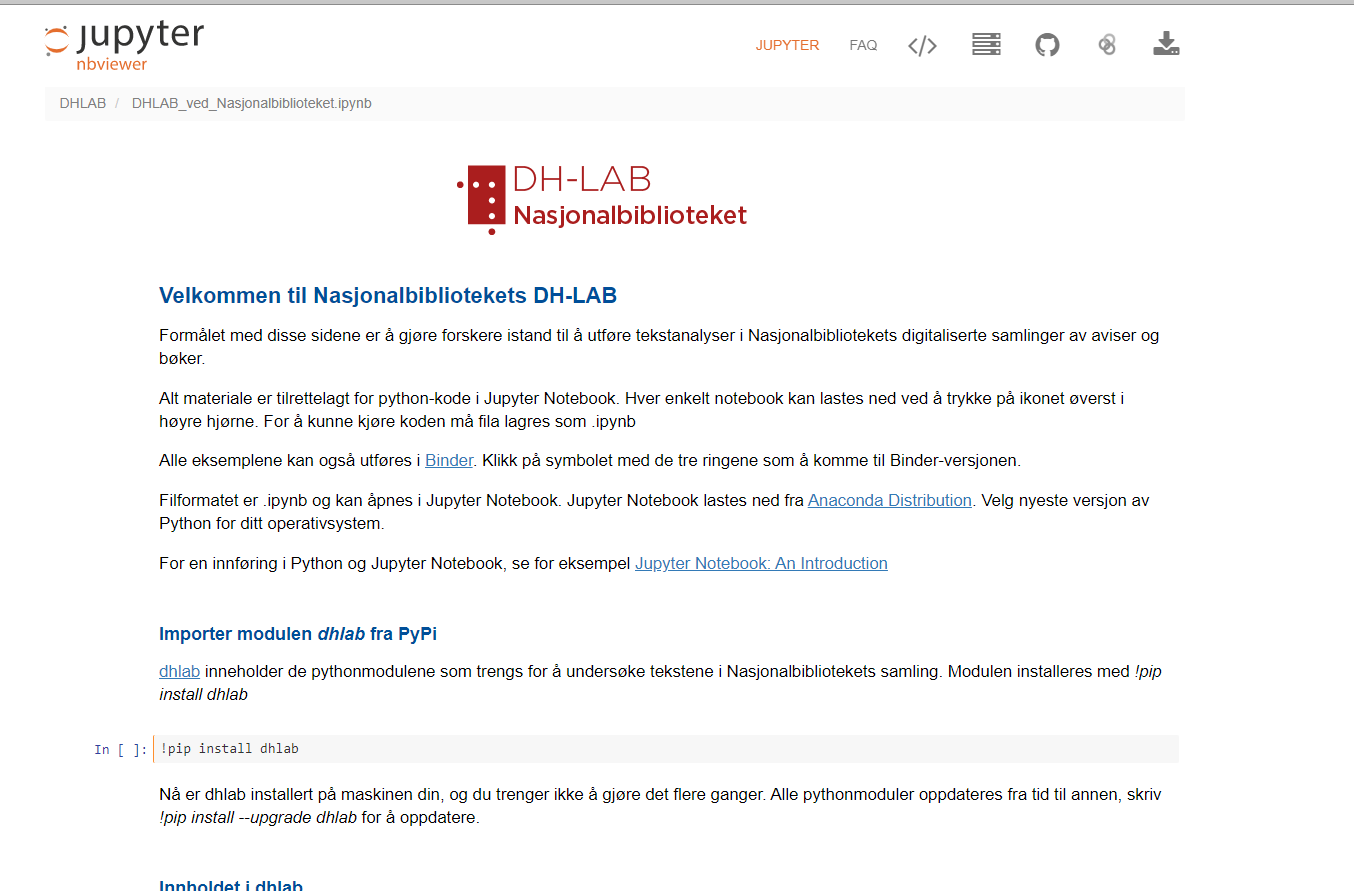

<br/>
<br/>
<br/>

# Ordet *demokrati*

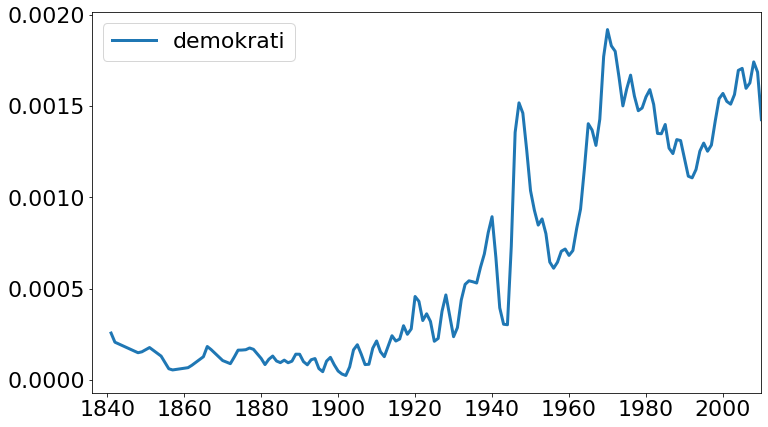

In [21]:
nb.nb_ngram('demokrati').plot(lw=3, figsize=(12,7));

<br>
<br>
<br>
<br>


# Flere ord







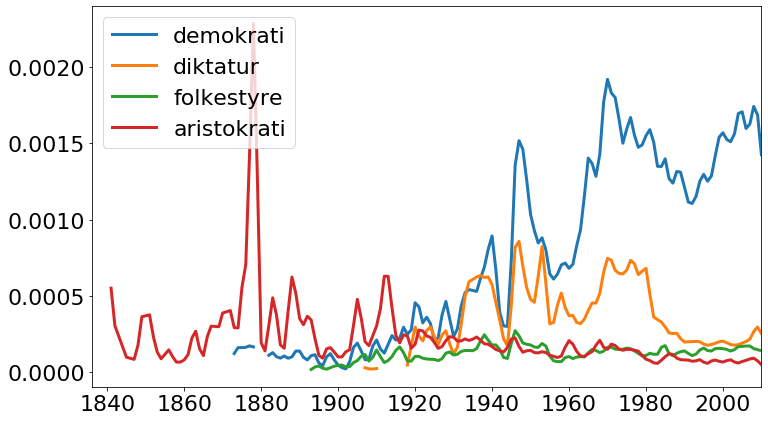

In [22]:
nb.nb_ngram('demokrati, diktatur, folkestyre, aristokrati').plot(lw=3, figsize=(12,7));

<br>
<br>
<br>
<br>

# Nettverk av ord rundt *demokrati*

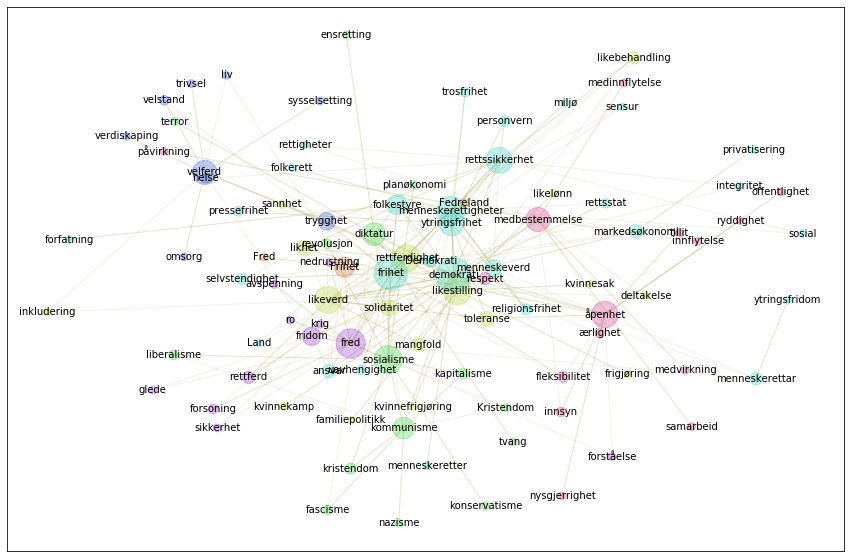

In [23]:
gnl.show_graph(demokrati, spread = 1.8);

In [24]:
comm = gnl.community_dict(demokrati)

<br>
<br>
<br>

# Clustre fra grafen

In [25]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### likestilling-likeverd
<span style='font-size:1.5em'>likestilling, likeverd, rettferdighet, solidaritet, likhet, toleranse, mangfold, likebehandling, kvinnesak, sannhet, kvinnekamp, likelønn, frigjøring, deltakelse, inkludering, kvinnefrigjøring, familiepolitikk</span>
### sosialisme-diktatur
<span style='font-size:1.5em'>sosialisme, diktatur, kommunisme, kristendom, kapitalisme, fascisme, revolusjon, liberalisme, planøkonomi, terror, nazisme, konservatisme, ensretting, tvang, Kristendom</span>
### demokrati-frihet
<span style='font-size:1.5em'>demokrati, frihet, menneskerettigheter, rettssikkerhet, ytringsfrihet, folkestyre, menneskeverd, markedsøkonomi, ansvar, Demokrati, menneskerettar, selvstendighet, fleksibilitet, religionsfrihet, personvern, uavhengighet, rettsstat, pressefrihet, trosfrihet, forfatning, miljø, privatisering, ytringsfridom, sensur, integritet, Land, menneskeretter, folkerett, rettigheter, sosial</span>
### velferd-trygghet
<span style='font-size:1.5em'>velferd, trygghet, velstand, helse, sysselsetting, omsorg, liv, verdiskaping, trivsel</span>
### fred-fridom
<span style='font-size:1.5em'>fred, fridom, rettferd, forsoning, avspenning, glede, nedrustning, ro, sikkerhet, forståelse, krig</span>
### åpenhet-medbestemmelse
<span style='font-size:1.5em'>åpenhet, medbestemmelse, respekt, innsyn, ærlighet, offentlighet, nysgjerrighet, medinnflytelse, ryddighet, påvirkning, tillit, innflytelse, samarbeid, medvirkning</span>
### Frihet-Fred
<span style='font-size:1.5em'>Frihet, Fred, Fedreland</span>


In [26]:
demokrati_dict = gnl.community_dict(demokrati)

<br>
<br>
<br>

# Studerer endring gjennom kollokasjoner
<br>
<span style="font-size:150%">nb.collocation('demokrati', yearfrom=1950, yearto=1955, before=10, after=10, corpus='avis')</span>


In [27]:
tot = nb.frame(nb.totals(50000), 'tot')

In [28]:
#colls = pd.concat([nb.frame(coll[d], d) for d in coll], axis=1, sort=False).fillna(0)

In [29]:
#colls.to_json('demokrati_collocations.json')

In [30]:
colls = pd.read_json('demokrati_collocations.json')

In [31]:
agg = pd.DataFrame()
step = 5
for i in range(0, len(colls.columns), step):
    agg[colls.columns[i]] = colls[colls.columns[i:i+step]].sum(axis=1)

<br>
<br>
<br>
<br>

# Demokrati fra opptelling

In [35]:
agg.sort_values(by=1965, ascending=False)[:10].style.background_gradient()

,1920,1935,1950,1965,1980,1995
.,4262,22259,53002,61217,71058,34017
",",3498,14590,34531,39347,44780,23009
i,1714,9301,28930,38056,39025,19008
og,2454,13872,30071,34995,42265,21121
det,2331,10884,24897,26313,23042,10598
er,1358,8257,20751,24514,28719,14964
for,1041,6615,17093,20587,23293,11373
som,1144,6834,16637,19322,19991,9803
et,824,5396,16211,18306,21271,10317
at,928,4498,12280,15167,15296,7255


In [36]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]/tot.tot

In [37]:
nb.normalize_corpus_dataframe(pmi)

True

# Sammenligner med en referanse


<br>

<span style="font-size:150%">`tot = nb.frame(nb.totals(50000), 'tot')`</span>

<br>
<br>
<br>
<br>


# De 15 beste for 1965

In [48]:
pmi.sort_values(by=1920, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
industrielt,0.0141323,0.00244299,0.0369976,0.0116689,0.000364157,8.81641e-05
parlamentariske,0.0080445,0.0021649,0.00322016,0.00410196,0.00175338,0.00160644
proletariatets,0.0069324,0.00111618,0.00133946,0.00216097,0.000595913,0.000155371
fascismen,0.00653303,0.00274847,0.000456681,0.000500644,0.000288456,0.000178539
borgerlige,0.00624715,0.00108557,0.00072647,0.000479735,0.000204884,0.000104857
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
liberalisme,0.0051254,0.00503985,0.0014192,0.000591404,0.000854051,0.000527263
demokratiets,0.0047873,0.00478999,0.00277496,0.003123,0.00161442,0.00131972
gjennemføre,0.00466799,0.000644221,6.24416e-05,0,0,0


In [39]:
pmi.sort_values(by=1935, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
kommunisme,0.00130812,0.00812394,0.00724425,0.00339172,0.00241329,0.00246976
sosialisme,0.00268965,0.00808811,0.00737364,0.0102617,0.00347929,0.00193598
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
levedyktig,0.000275952,0.00531267,0.00323356,0.0037273,0.00249618,0.00166987
demokratiet,0.00377596,0.00507445,0.00302559,0.00357549,0.00265602,0.00265205
liberalisme,0.0051254,0.00503985,0.0014192,0.000591404,0.000854051,0.000527263
demokratiets,0.0047873,0.00478999,0.00277496,0.003123,0.00161442,0.00131972
Sovjet-Samveldet,0.000247471,0.00420082,0.00131088,8.3985e-05,0,0
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513


<br>
<br>

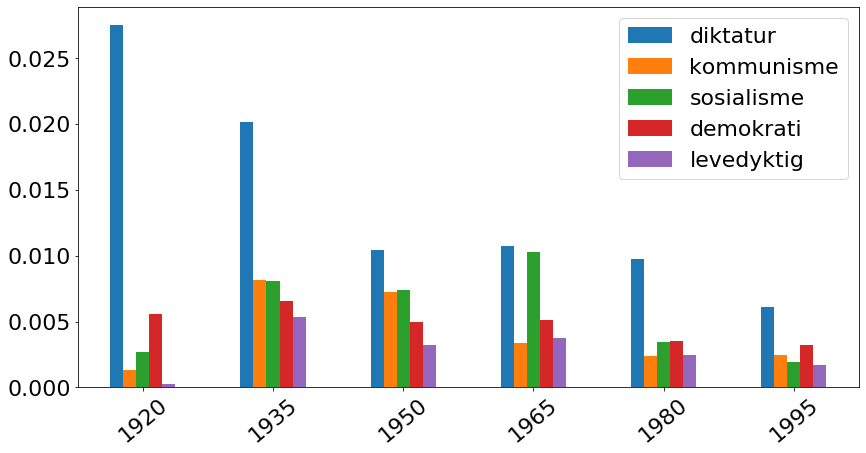

In [41]:
pmi.sort_values(by=1935, ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=40);

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden 1965-1980 sortert på ordklasser

In [39]:
mdprint(pmi.sort_values(by=1965, ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Demokrati, Hellas, NTB, Bratteli, Arbeiderpartiets, Venstres, EEC, Borten, Arbeiderpartiet, 19.00, Portugal, Høyres, Willoch, Sosialistisk, Tsjekkoslovakia, Landsorganisasjonen, Nordli, Vårt, Statsminister, 20.00, Spanias, Gustavsen</span>

## adj
<span style='font-size:1.5em'>industrielt, parlamentarisk, sosialistisk, parlamentariske, levedyktig, liberalt, sosialistiske, reelt, folkevalgte, vestlig, demokratiske, portugisiske, demokratisk, totalitære, forenlig, uforenlig, uverdig, sunt, representative</span>
## subst
<span style='font-size:1.5em'>diktatur, sosialisme, demokrati, demokratiet, kommunisme, styreform, hverdagen, rettssikkerhet, ytringsfrihet, spilleregler, styresett, fagbevegelsen, trusel, byråkrati, velgerne, menneskeverd, sosialismen, arbeidslivet, frihet, solidaritet, fridom, folkeavstemning, menneskerettigheter, likestilling, slagord, humanisme, parodi, slagordet, valgkampen, kapitalisme, arbeiderbevegelse, komité, toleranse, medansvar, rettferd, suverenitet, arbeiderbevegelsen, uavhengighet, sosialister</span>
## unknown
<span style='font-size:1.5em'>arbeidsplassen, demokratiets, proletariatets, demokratisering, kvardagen, desentralisering, arbeidsplassene, onsker, komite, medbestemmelse, arbeiderbevegelsens, folkenes, samfunnslivet, stotte, flertallets, språkleg</span>
## verb
<span style='font-size:1.5em'>undergrave, praktiserer, framholdt</span>
## det
<span style='font-size:1.5em'>vårt</span>


# Hvordan utvikler ordene seg?

In [42]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar', rot=40) ;

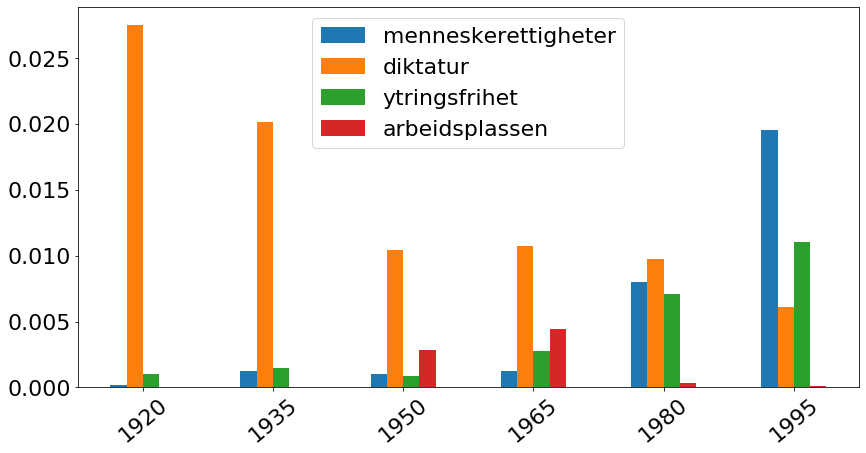

In [44]:
barchart(['menneskerettigheter','diktatur',"ytringsfrihet", 'arbeidsplassen'], 'Utvalgte ord');

<br>
<br>

# Sjekk ut vanlige ord

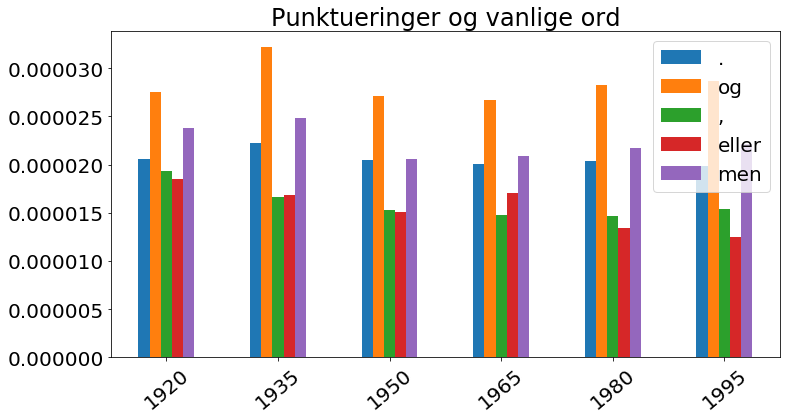

In [42]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord');

<br>
<br>

# De fremste blandt temaene

In [43]:
pos=""
for x in demokrati_dict:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(demokrati_dict[x][:5]) ) + "\n"
mu.printmd(pos)

### likestilling-rettferdighet
<span style='font-size:1.5em'>likestilling, rettferdighet, likeverd, solidaritet, toleranse</span>
### sosialisme-diktatur
<span style='font-size:1.5em'>sosialisme, diktatur, kommunisme, Demokrati, kapitalisme</span>
### demokrati-frihet
<span style='font-size:1.5em'>demokrati, frihet, menneskerettigheter, rettssikkerhet, ytringsfrihet</span>
### velferd-trygghet
<span style='font-size:1.5em'>velferd, trygghet, velstand, helse, trivsel</span>
### fred-fridom
<span style='font-size:1.5em'>fred, fridom, rettferd, forsoning, krig</span>
### åpenhet-medbestemmelse
<span style='font-size:1.5em'>åpenhet, medbestemmelse, respekt, fleksibilitet, innsyn</span>
### Frihet-Fred
<span style='font-size:1.5em'>Frihet, Fred, Fedreland</span>


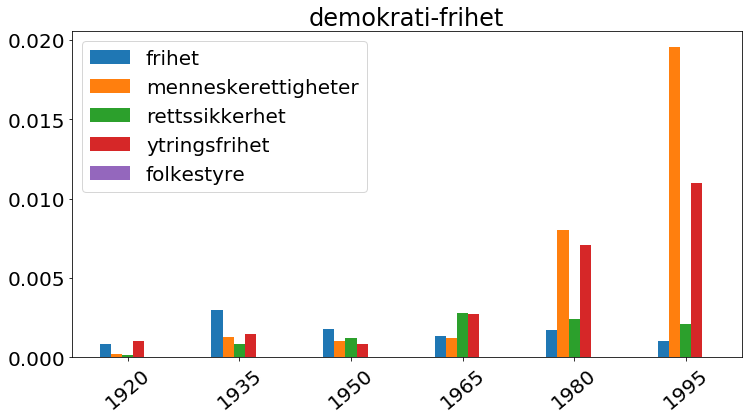

In [44]:
barchart(demokrati_dict['demokrati-frihet'][1:6], 'demokrati-frihet');

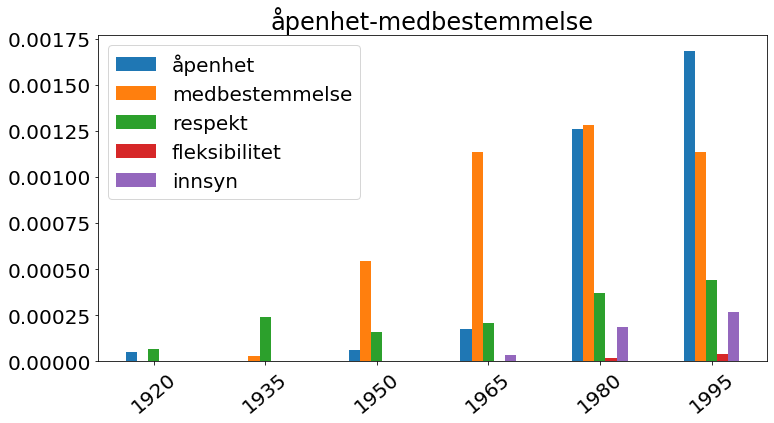

In [48]:
barchart(demokrati_dict['åpenhet-medbestemmelse'][0:5],'åpenhet-medbestemmelse' );

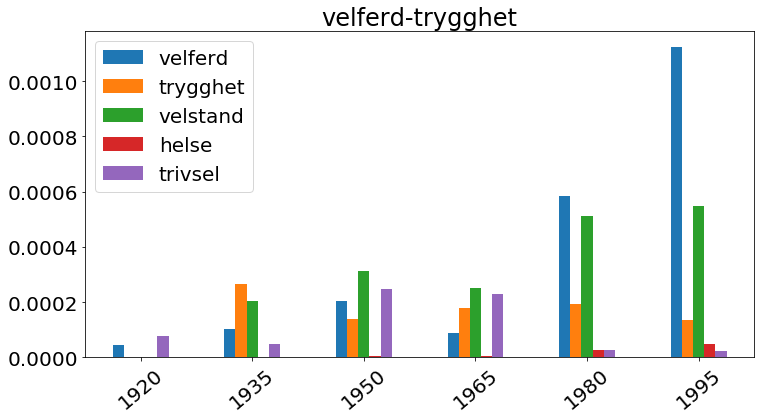

In [49]:
barchart(demokrati_dict['velferd-trygghet'][0:5],'velferd-trygghet' );

<br>
<br>
<br>

Flere analyser. Repeter kollokasjonsstrukturene for relaterte ord. Formalisere vektorsammenligninger (=embedding)